## Identifying Fraud Activities
Company XYZ is an e-commerce site that sells hand-made clothes. Build a model that predicts whether a user has a high probability of using the site to perform some illegal activity or not. You only have information about the user first transaction on the site and based on that you have to make your classification(fraud or no fraud).

These are the tasks you are asked to do:
1. For each user, determine her country based on the numeric IP address.
2. Build a model to predict whether an activity is fraudulent or not. Explain how different
assumptions about the cost of false positives vs false negatives would impact the model.

    Ans: High false positive means good transactions are interrupted and considered as fraud. This may increase the churn rate. High false negative means fraud activities are not caught. They company would loose money due to these transactions. 

3. Your boss is a bit worried about using a model she doesn't understand for something as
important as fraud detection. How would you explain her how the model is making the
predictions? Not from a mathematical perspective (she couldn't care less about that), but
from a user perspective. What kinds of users are more likely to be classified as at risk?
What are their characteristics?

    Ans: The most important variable is the time between signing up and purchasing. The sooner that the user purchases an item after signing up, the more likely the transaction is a fraud.

    The second import variable is the purchase amount. The less the transaction, the more likley it is a fraud.

4. Let's say you now have this model which can be used live to predict in real time if an
activity is fraudulent or not. From a product perspective, how would you use it? That is,
what kind of different user experiences would you build based on the model output?

    Ans: 
    A) if P(Fraud) < X, the user has a typical experience
    B) if X <= P(Fraud) < Z, the user has a second verification step (verify phone number)
    C) if P(Fraud >= Z, the user is referred to a person to manually verify the account

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Import data

In [3]:
data = pd.read_csv('Fraud/Fraud_Data.csv')
IP = pd.read_csv('Fraud/IpAddress_to_Country.csv')

In [3]:
data.shape

(151112, 11)

In [4]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
#unbalanced class
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [6]:
data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


## 2. Data preprocess
First, to answer the question 1, determine her country based on the numeric IP address.

In [40]:
#transform to matrix for fast compute 
IP2 = IP.as_matrix()

In [ ]:
#find the country corresponding to ip address
country = []
for ip in data['ip_address']:
    c = IP2[np.add((IP2[:,0] <= ip), (IP2[:,1] >= ip), dtype=np.float) == 2, 2]
    if len(c) == 1:
        country.append(c)
    else:
        country.append(None)

#append country to dataframe
data['country'] = country
data['country'] = data['country'].astype(str)

#save data to file
data.to_csv('fraud_data.csv',index=False)

In [4]:
#load data with country
data = pd.read_csv('fraud_data.csv')
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,['Japan']
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,['United States']
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,['United States']
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,['United States']


In [5]:
#check if any duplicates
df = data
df['country']=df['country'].astype(str)
df = df.drop_duplicates()
df.shape

(151112, 12)

In [6]:
#check if any missing values
df.isnull().any()
df = df.dropna()

In [7]:
#transform all categorical data to numerical
for col in ['source','browser','sex']:
    dummy = pd.get_dummies(df[col])
    df = pd.concat([df,dummy], axis=1)
    df = df.drop(col,axis=1)

df = df.drop(['F','Direct','IE'],axis=1)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,Ads,SEO,Chrome,FireFox,Opera,Safari,M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,['Japan'],0,1,1,0,0,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,['United States'],1,0,1,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,['United States'],0,1,0,0,1,0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,None,0,1,0,0,0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,['United States'],1,0,0,0,0,1,1


In [8]:
#create time col as the time between signup and purchase
df['time'] = (pd.to_datetime(df['purchase_time'])-pd.to_datetime(df['signup_time']))/np.timedelta64(1,'h')
df = df.drop('purchase_time',axis=1)
df = df.drop('signup_time', axis=1)

In [9]:
#count of users with the same device
df['device_count'] = df.groupby(['device_id'])['device_id'].transform('count')

#count of users with the same ip
df['ip_count'] = df.groupby(['ip_address'])['ip_address'].transform('count')
df = df.drop(['device_id','ip_address','user_id'],axis=1)

In [10]:
#use df1 for model with all numerical 
df1 = df
df1 = df1.drop('country',axis=1)

#find obvious correlation
df1.corr()

,purchase_value,age,class,Ads,SEO,Chrome,FireFox,Opera,Safari,M,time,device_count,ip_count
purchase_value,1.000000,0.002370,0.001011,-0.000439,0.000322,0.004355,-0.002140,-0.003304,0.002042,0.001996,0.003441,0.003829,0.003266
age,0.002370,1.000000,0.006624,-0.000646,-0.002238,-0.001324,-0.000771,-0.008450,0.003857,0.004093,-0.000575,0.012160,0.012170
class,0.001011,0.006624,1.000000,-0.004393,-0.012251,0.014620,0.002299,-0.002395,-0.005222,0.007639,-0.257888,0.670837,0.658625
Ads,-0.000439,-0.000646,-0.004393,1.000000,-0.663050,-0.000953,0.002925,-0.003836,-0.000943,-0.000214,-0.002798,0.000793,-0.000143
SEO,0.000322,-0.002238,-0.012251,-0.663050,1.000000,-0.006734,0.002826,0.004685,0.005166,0.001653,0.004042,-0.003905,-0.003494
Chrome,0.004355,-0.001324,0.014620,-0.000953,-0.006734,1.000000,-0.365054,-0.130688,-0.365558,-0.000547,-0.012121,0.020336,0.020258
FireFox,-0.002140,-0.000771,0.002299,0.002925,0.002826,-0.365054,1.000000,-0.069646,-0.194811,0.000388,0.000416,0.004210,0.004467
Opera,-0.003304,-0.008450,-0.002395,-0.003836,0.004685,-0.130688,-0.069646,1.000000,-0.069742,0.005417,0.001476,-0.001785,-0.001912
Safari,0.002042,0.003857,-0.005222,-0.000943,0.005166,-0.365558,-0.194811,-0.069742,1.000000,-0.001658,0.009258,-0.009957,-0.010119
M,0.001996,0.004093,0.007639,-0.000214,0.001653,-0.000547,0.000388,0.005417,-0.001658,1.000000,-0.005212,0.006759,0.006580


In [11]:
#drop device_count as it has high correlation with ip_count
df1 = df1.drop('device_count',axis=1)

(array([  2.14530000e+04,   3.41450000e+04,   3.87810000e+04,
          3.08190000e+04,   1.49290000e+04,   7.98300000e+03,
          2.44900000e+03,   4.91000000e+02,   5.50000000e+01,
          7.00000000e+00]),
 array([ 18. ,  23.8,  29.6,  35.4,  41.2,  47. ,  52.8,  58.6,  64.4,
         70.2,  76. ]),
 <a list of 10 Patch objects>)

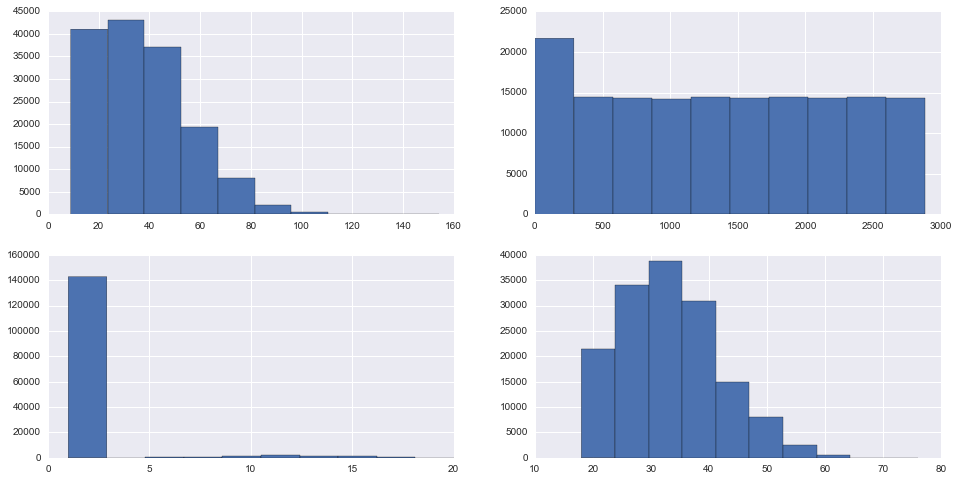

In [12]:
#visualization
fig,ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].hist(df1.purchase_value)
ax[0,1].hist(df1.time)
ax[1,0].hist(df1.ip_count)
ax[1,1].hist(df1.age)

(array([ 136961.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   14151.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

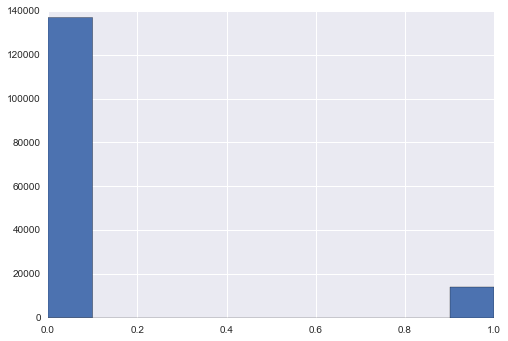

In [13]:
plt.hist(df1['class'])

## 3. Models
1. Start with logistic regression+lasso using balanced weights;
2. Random forest including country information;

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve,auc,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [108]:
#prepare X and y
y = df1['class']

#set ip counts into two categories
#X.ip_count.value_counts()
#X[X.ip_count==1] = 0
#X[X.ip_count>1] = 1
#X.ip_count.value_counts()

X = df1.drop('class',axis=1)
#scaler = StandardScaler().fit(X)
#X_scale = scaler.transform(X)

#prepare train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [109]:
#logistic regression + lasso
model = LogisticRegression(penalty='l1',class_weight='balanced',random_state=0)
solution = model.fit(X_train, y_train)

In [110]:
#roc curve
y_pred = solution.predict_proba(X_test)
y_scores = pd.DataFrame(y_pred)[1]
fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_scores.ravel())
auc(fpr,tpr)

0.77589644227856802

The AUC is 0.775896


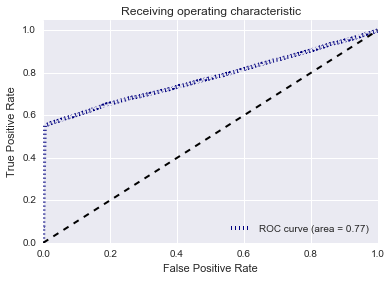

In [111]:
#plot ROC curve
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area = 0.77)',linestyle=':',linewidth=4,color='navy')
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving operating characteristic')
plt.legend(loc='lower right')
print "The AUC is %f" % (auc(fpr,tpr))

In [92]:
#f score
y_pred_class = solution.predict(X_test)
print "The f score is %f " %(f1_score(y_test, y_pred_class))

#confusion matrix
cm = confusion_matrix(y_test,y_pred_class)
print cm

The f score is 0.688288 
[[40966   211]
 [ 1865  2292]]


In [93]:
#random forest
clf = RandomForestClassifier(random_state=0)
solution_rf = clf.fit(X_train,y_train)

#roc curve
y_pred_rf = solution_rf.predict_proba(X_test)
y_scores_rf = pd.DataFrame(y_pred_rf)[1]
fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_scores_rf.ravel())
y_pred_class_rf = solution_rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_pred_class_rf)

print 'The AUC is %s.' %auc(fpr,tpr)
print 'The confusion matrix is below:'
print cm_rf

The AUC is 0.775764890996.
The confusion matrix is below:
[[41074   103]
 [ 1866  2291]]


In [94]:
#feature importance 
feature_importance = feature_importance.sort_values(by='importance',ascending=False)
print feature_importance

          features  importance
9             time    0.705013
0   purchase_value    0.120039
1              age    0.089358
10        ip_count    0.067193
4           Chrome    0.004800
8                M    0.004243
5          FireFox    0.002695
7           Safari    0.002566
3              SEO    0.001678
2              Ads    0.001227
6            Opera    0.001187


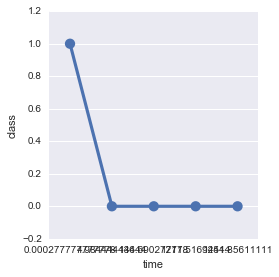

In [15]:
#the longer the time, the more likely to be fraud
sns.factorplot(x='time',y='class',data=df1.head())

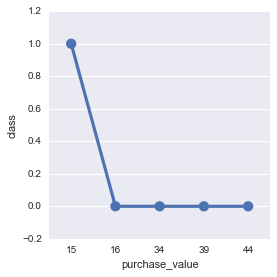

In [16]:
sns.factorplot(x='purchase_value',y='class',data=df1.head())

## 4. Conclusions
To detect fraud, the two most important variables are the time between signing up and making a purchase, and the purchase amount. Other factors include the number of accounts associated with one ip address, and age.